# Part 1: Network Analysis - Overview

### What is Network Analysis?

- Network analysis is the study of relationships and interactions between objects.

- It's a way to map and explore how items (people, companies, cities, computers etc.) are **connected** and how information, money, or influence **flows** between them.

- it is a **interdisciplinary approach**: widely used across various fields, powerful in economics and finance.

Many complex systems can be visualized as networks. Examples:

1) Facebook analyzes how people are connected to suggest friends.

2) Banks use networks to see how money flows between institutions.

3) Biologists map protein interactions to understand diseases.

### **Why apply Network Analysis to Economics and Finance?**

- Network analysis isn’t traditionally part of economics or finance methods of analysis, but it offers new insights that traditional methods might miss.

- Markets are networks. From trading relationships to interbank exposures, network analysis helps reveal the hidden connections that drive market behavior.

- It can detect patterns like financial contagion or systemic risk by analyzing relationships, not just individual entities.

- It can measure the centrality of key players in markets (e.g., firms, banks, CEOs) to better understand influence and control. Real-World Impact: Applied in areas like credit networks, financial stability, supply chains, and more.

Python provides a very useful and efficient library to study networks: `NetworkX`. This tutorial will cover the following points:
- definition and basic analysis of a network
- creation of a network from skratch
- analysis of a network from a dataset
- main indices to study a network

# 2. What is a network?

A network (or graph) is a set of **nodes** connected by **edges**:

- **Nodes** (or vertices) (V): the objects or entities in the network. E.g. banks, people, firms, cities

- **Edges** (or links) (E): the connections or relationships between pairs of nodes. E.g. borrowing-lending, friendships, ownership, railways


Formally, a network is denoted as *G = (V, E)*.
Example: Facebook is a network where people are the nodes and friendships are the edges.

# 3. Structural Properties of Networks

Different types of graphs can be used to model different types of relationships or networks. We categorize networks according to: 
- **Direction** ⟶ *who* is exposed to whom
- **Weight** ⟶ *magnitude* of exposure

# 3.1 Directionality

Under directionality, we can distinguish between two types of graphs:

- **Undirected Graph**: connections have no direction - the relationship is mutual. E.g. a friendship or partnership. If you’re friends with someone, it’s a two-way street.


- **Directed Graph**: connections have a direction - from one node to another. E.g. following someone on Instagram, borrowing and lending. Bank A might lend money to Bank B, but Bank B might not lend to A.


Up to now, we implicitly assumed that all the links in a network represent the same kind of relationships (e.g.: all the links represent borrowing-lending relationships). When relaxing this assumption, we have:

- **Multigraph**: there are different types of connections (edges) between the same pair of nodes. E.g. different public transports in Brussels (metro, tram, bus). There can be more than one (type of) connection between two points.

`NetworkX` allows you to create networks from scratch, by defining the number of nodes and the edges between them. You can assign numbers or letter to nodes. First of all, install the library

In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


And then import it, together with other useful libraries you already saw:

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

The commands to initialize the empty graph for the three types just described are the following:

In [5]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

For example, you can create a undirected graph with 4 nodes in this way:

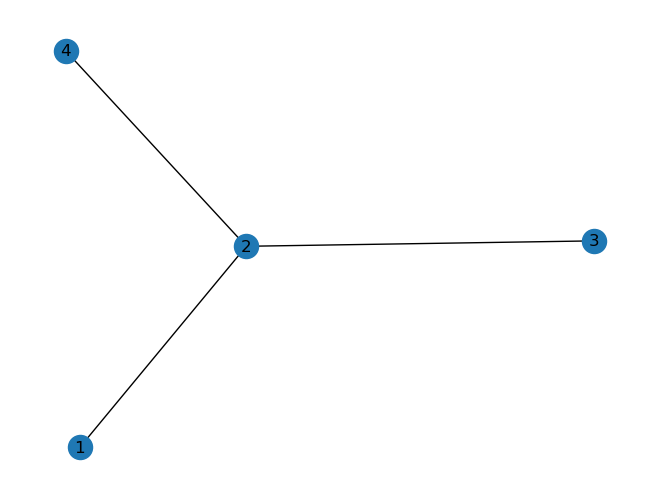

In [6]:
# Create an empty graph
G = nx.Graph()

# Add nodes and edges
G.add_node(1)                # add one node at a time (inefficient)
G.add_nodes_from([2, 3, 4])  # add multiple nodes at once through a list (efficient)
G.add_edges_from([(1, 2), (2, 3), (2, 4)])

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

Or you can create, for instance, a directed graph with a random number of connections, once defined the number of nodes and edges.

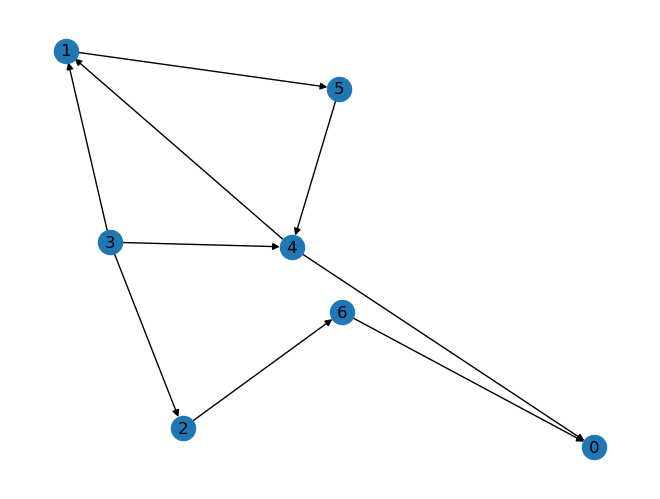

In [7]:
nodes = 7
edges = 9

G = nx.gnm_random_graph(nodes, edges, directed=True)

# Visualize the directed graph
nx.draw(G, with_labels=True, arrows=True)
plt.show()

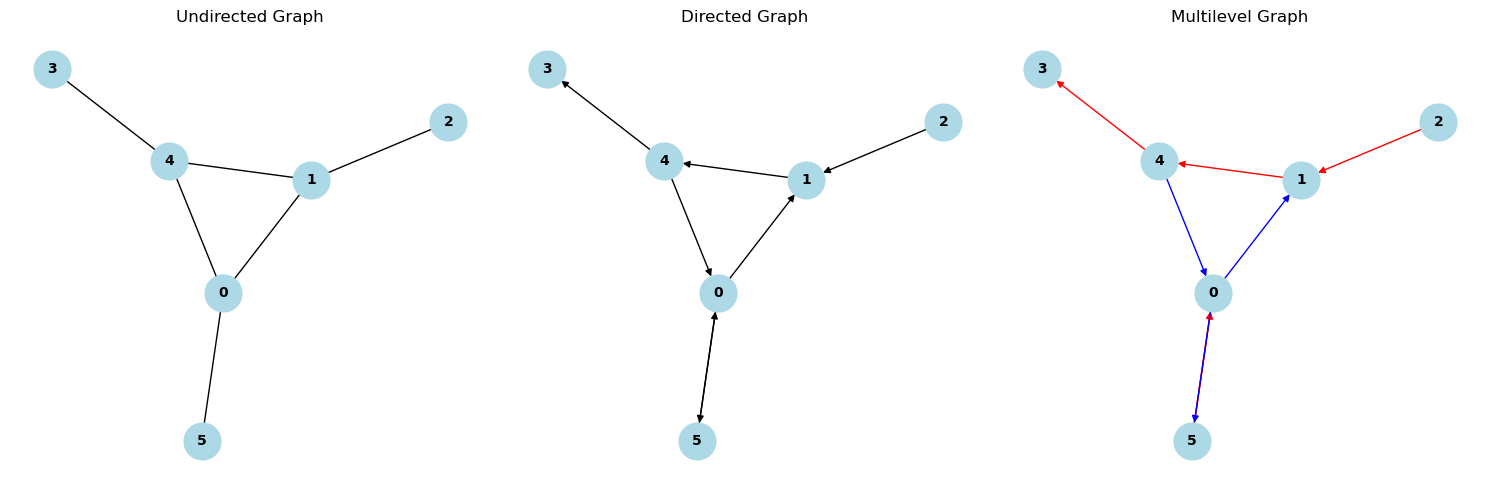

In [8]:
import random

# Set a random seed 
random.seed(42)

# Define the number of nodes and edges
n_nodes = 6
n_edges = 8 

# Generate random edges with no self-loops
edges = []
while len(edges) < n_edges:
    u, v = random.randint(0, n_nodes-1), random.randint(0, n_nodes-1)
    if u != v:  # Ensure no self-loops
        edges.append((u, v))

        
# Create a function to plot the graph
def plot_graph(ax, G, title, pos, edge_colors=None, arrows=False):
    ax.set_title(title)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=700, edge_color=edge_colors, arrows=arrows,
            font_size=10, font_weight='bold', ax=ax, arrowstyle='-|>' if arrows else None)

# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

# 1. Undirected Graph
undirected_graph = nx.Graph()
undirected_graph.add_edges_from(edges)
pos = nx.spring_layout(undirected_graph)  # A way to position nodes in the graph
plot_graph(axes[0], undirected_graph, 'Undirected Graph', pos)

# 2. Directed Graph
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(edges)
plot_graph(axes[1], directed_graph, 'Directed Graph', pos, arrows=True)

# 3. Multilevel Graph (with two layers)
multilevel_graph = nx.MultiDiGraph() 
# Split the edges randomly into two types
random.shuffle(edges)
split_point = len(edges) // 2
edges_type1 = edges[:split_point]  # First type of edges (red)
edges_type2 = edges[split_point:]  # Second type of edges (blue)

multilevel_graph.add_edges_from(edges_type1, type='type1')
multilevel_graph.add_edges_from(edges_type2, type='type2')

edge_colors = ['red' if edge in edges_type1 else 'blue' for edge in multilevel_graph.edges()]
plot_graph(axes[2], multilevel_graph, 'Multilevel Graph', pos, edge_colors=edge_colors, arrows=True)

plt.tight_layout()  # Adjusts spacing between plots
plt.show()


# 3.2 Strength

The edges in a network might not all have the same level of importance. In such case, we say that they have different weight/strength. We distinguish between:

- **Unweighted graphs** = graphs where all edges have the same "weight" or importance. The edges only indicate the presence of a connection. 

- **Weighted graphs** = graphs where each edge has an associated numerical value, the "weight". This weight represents something meaningful about the connection (distance, cost, strength, money).

E.g. In an interbank network the weight of an edge can be the amount lent to a bank from another. Without including the weight in your analysis, you might know (if the graph is directed) that bank A borrows from bank B, but you wouldn't know the exact amount borrowed.

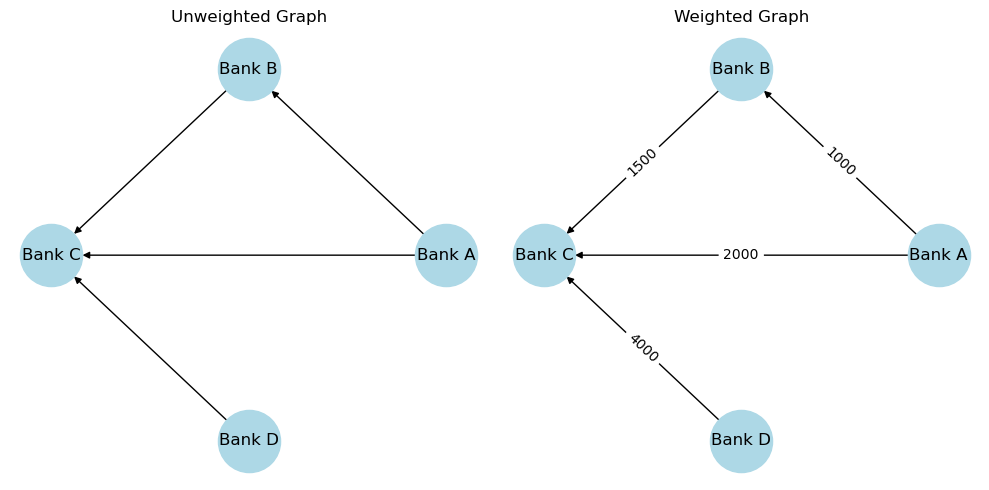

In [9]:
G = nx.DiGraph()

# Add edges with weights (representing loan amounts between banks)
G.add_edge('Bank A', 'Bank B', weight=1000)
G.add_edge('Bank B', 'Bank C', weight=1500)
G.add_edge('Bank A', 'Bank C', weight=2000)
G.add_edge('Bank D', 'Bank C', weight=4000)

# Position nodes (see later)
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 5))

# Subplot 1 - Unweighted graph (only showing arrows without weights)
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
plt.title("Unweighted Graph")

# Subplot 2 - Weighted graph (showing arrows with edge weights)
plt.subplot(1, 2, 2)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph")

plt.tight_layout()
plt.show()


Another way to visualize this different levels of importance is by making the thickness of the edges proportional to their weight:

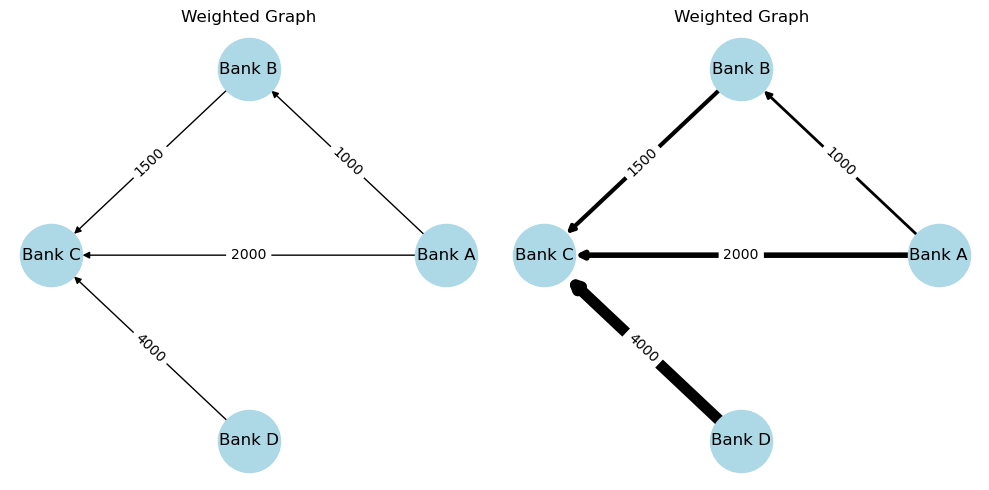

In [10]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 5))

# Subplot 1 - Weighted graph labels
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph")

# Subplot 2 - Weighted graph labels + thickness
plt.subplot(1, 2, 2)
# Extract edge weights and scale them 
weights = [G[u][v]['weight'] / 500 for u, v in G.edges()]  # scale (/500) so that the thickness is reasonable

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, width=weights, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph")

plt.tight_layout()
plt.show()


# Adjacency matrix

Networks are often represented with an **adjacency matrix**. An adjacency matrix *Aij* is a square matrix where the number of columns/rows equals the number of nodes of the network and each cell "*aij*" shows the relationship (edge) between nodes *i* and *j*.

1. **Unweighted network** (Binary Matrix) = if an edge exists between nodes i and j, aij = 1; otherwise, aij = 0.

2. **Weighted network** = cells aij contain values representing the weight of the edge.

3. **Undirected Networks** = the matrix is symmetric. If i is connected to j, then j is connected to i, meaning aij = aji.

4. **Directed Networks** = the matrix is potentially asymmetrical due to the directionality.

Adjacency Matrix (Undirected, Unweighted):
 [[0 1 0 1 1]
 [1 0 1 0 0]
 [0 1 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 0]] 

Adjacency Matrix (Undirected, Weighted):
 [[0 1 0 6 0]
 [1 0 9 0 9]
 [0 9 0 9 9]
 [6 0 9 0 0]
 [0 9 9 0 0]] 

Adjacency Matrix (Directed, Unweighted):
 [[0 1 0 0 1]
 [0 0 1 0 1]
 [0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]] 

Adjacency Matrix (Directed, Weighted):
 [[0 6 8 0 0]
 [0 0 4 4 0]
 [0 0 0 0 0]
 [0 0 6 0 0]
 [0 0 6 0 0]] 



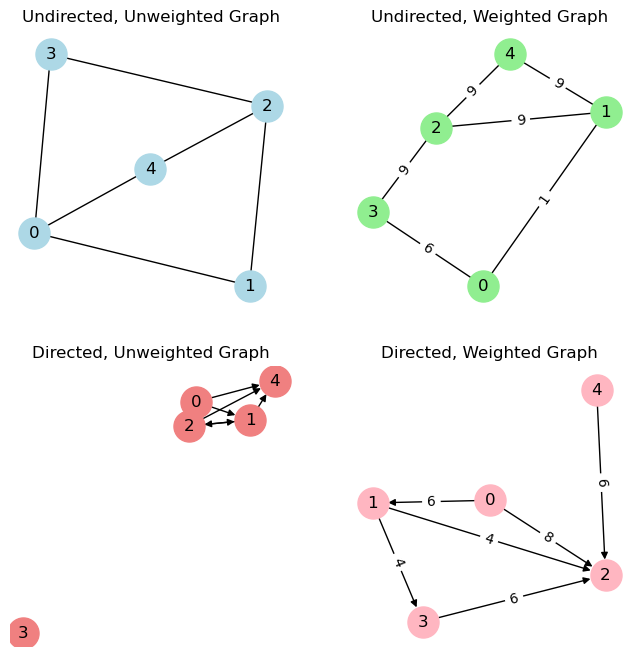

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

nodes = 5
edges = 6

# 1. Undirected, Unweighted Graph
G1 = nx.gnm_random_graph(nodes, edges, directed=False)
aij_G1 = nx.adjacency_matrix(G1).todense()

# 2. Undirected, Weighted Graph
G2 = nx.gnm_random_graph(nodes, edges, directed=False)
for (u, v) in G2.edges():
    G2[u][v]['weight'] = np.random.randint(1, 10)
aij_G2 = nx.adjacency_matrix(G2, weight='weight').todense()

# 3. Directed, Unweighted Graph
G3 = nx.gnm_random_graph(nodes, edges, directed=True)
aij_G3 = nx.adjacency_matrix(G3).todense()

# 4. Directed, Weighted Graph
G4 = nx.gnm_random_graph(nodes, edges, directed=True)
for (u, v) in G4.edges():
    G4[u][v]['weight'] = np.random.randint(1, 10)
aij_G4 = nx.adjacency_matrix(G4, weight='weight').todense()


# Plot Aij + Graph
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# G1
nx.draw(G1, with_labels=True, node_color="lightblue", node_size=500, ax=axes[0, 0])
axes[0, 0].set_title("Undirected, Unweighted Graph")
print("Adjacency Matrix (Undirected, Unweighted):\n", aij_G1, "\n")

# G2
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color="lightgreen", node_size=500, ax=axes[0, 1])
nx.draw_networkx_edge_labels(G2, pos, edge_labels={(u, v): G2[u][v]['weight'] for u, v in G2.edges()}, ax=axes[0, 1])
axes[0, 1].set_title("Undirected, Weighted Graph")
print("Adjacency Matrix (Undirected, Weighted):\n", aij_G2, "\n")

# G3
nx.draw(G3, with_labels=True, node_color="lightcoral", node_size=500, ax=axes[1, 0])
axes[1, 0].set_title("Directed, Unweighted Graph")
print("Adjacency Matrix (Directed, Unweighted):\n", aij_G3, "\n")

# G4
pos = nx.spring_layout(G4)
nx.draw(G4, pos, with_labels=True, node_color="lightpink", node_size=500, ax=axes[1, 1])
nx.draw_networkx_edge_labels(G4, pos, edge_labels={(u, v): G4[u][v]['weight'] for u, v in G4.edges()}, ax=axes[1, 1])
axes[1, 1].set_title("Directed, Weighted Graph")
print("Adjacency Matrix (Directed, Weighted):\n", aij_G4, "\n")

plt.show()


You can also create the graph directly from the adjacency matrix. 

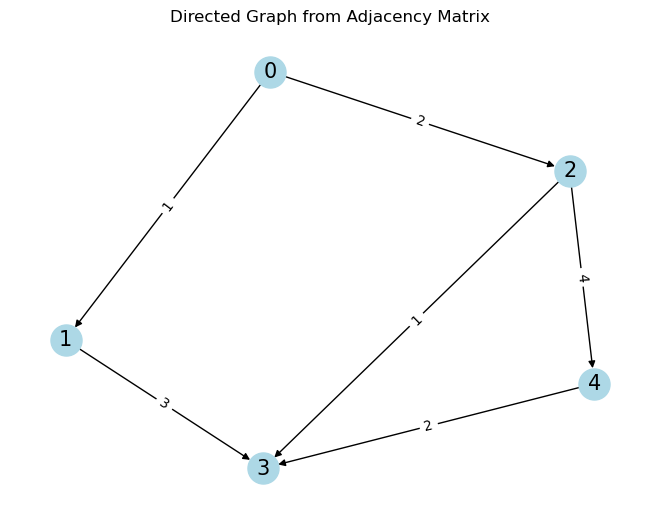

In [12]:
adj_matrix = np.array([
    [0, 1, 2, 0, 0],
    [0, 0, 0, 3, 0],
    [0, 0, 0, 1, 4],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0]
])

G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=15, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): adj_matrix[i, j] for i in range(len(adj_matrix)) for j in range(len(adj_matrix)) if adj_matrix[i, j] != 0})
plt.title("Directed Graph from Adjacency Matrix")
plt.show()


# Part 2: Network Analysis of a real dataset

Now we will do network analysis on a real dataset. The dataset is taken from the following paper: "Vitali, S., Glattfelder, J. B., & Battiston, S. (2011). The network of global corporate control. PloS one, 6(10), e25995.". 
The dataset consists of a subset of transnational companies that in the paper dominates a much larger
list of companies. The links between nodes denote shareholdership.

## 1. Visualize the network

First of all, we are going to import the dataset with `pandas` and visualize it. 

In [13]:
import pandas as pd

file_path = "ownership.txt"  # Path to the file

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, sep=" ", header=None, names=["u", "v"])

# Print the first rows of the DataFrame
print(df.head())

   u    v
0  0  130
1  0    8
2  0  138
3  0   11
4  0   14


Since we talk about shareholdership, the network is directed. Each row represents a shareholding relationship between two companies:
- Column "**u**": The company that **owns** shares (the owner).
- Column "**v**": The company that is **owned** (the owned entity).

Each edge (u -> v) indicates that company u holds shares in company v. For example, in the first row, company 0 owns shares in company 130, and graphically this consists in an arrow originating from node labeled "0" and pointing to node labeled "130".
There is no column identifying the strength of the relationships (namely, the share of ownership), hence the network is directed but unweighted.
Now we can visualize the network.


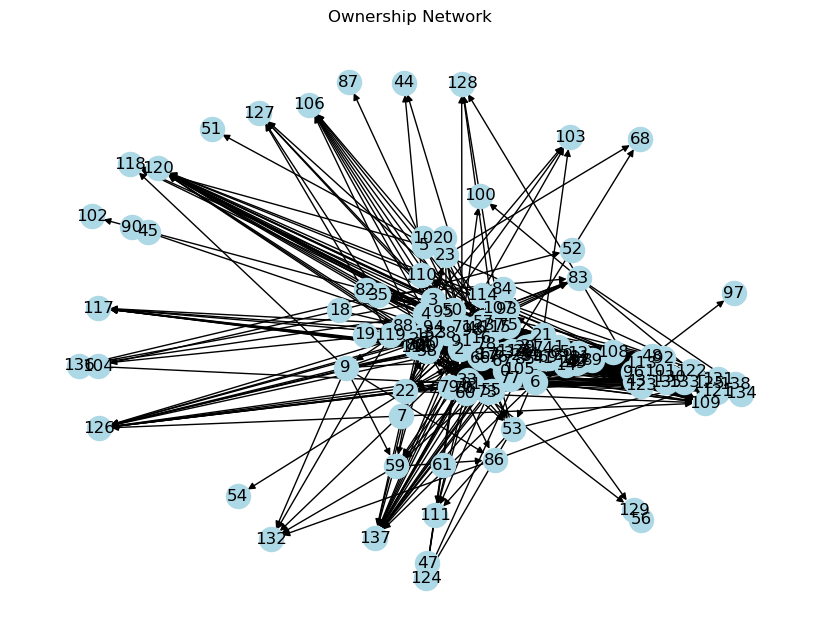

In [14]:
# Create a list of edges
edges = []
with open(file_path, 'r') as f:
    for line in f:
        u, v = line.split()             # Each line has two numbers representing an edge (u -> v)
        edges.append((int(u), int(v)))  # Define the edge (int() because we have integers)

# Create a empty directed graph and then add edges
G = nx.DiGraph()
G.add_edges_from(edges)

# Visualize the graph method 1: simple way
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=300, arrows=True)
plt.title("Ownership Network")
plt.show()

`nx.draw` is the simplest way in which you can visualize your graph, but there are more. For instance:
- `draw_circular` 
- `draw_spectral`
- `draw_random`
- `draw_spring`

## 2. Macro-structure analysis

The macro-structure analysis investigates the network as a whole. Examines properties like:
- Overall connectivity and density
- Network topology (hubs, clustering, small-world): how the connections are distributed across the system
- System-level vulnerability to cascades

Answers questions such as: *How resilient is the system as a whole? How fast could a shock spread?*

We proceed by inspecting the **size** of the network:
- *Number of Nodes (Companies)*: total number of distinct companies in the dataset
- *Number of Links (Shareholding Relationships)*: total number of edges or links between the companies, showing how many shareholding relationships exist in the network.
This gives an idea of the scale and complexity.

In [19]:
nodes = G.number_of_nodes()  # Number of nodes
edges = G.number_of_edges()  # Number of edges

print(f"Number of nodes: {nodes}")
print(f"Number of links: {edges}")

Number of nodes: 139
Number of links: 1071


 **Density** shows the proportion of actual connections to possible connections. A low density suggests a sparse network, typical in shareholdership networks where not all companies own shares in one another.

In [20]:
density = nx.density(G)
print("Density:", density)

Density: 0.05583359399436972


A density of 0.0558 in your network indicates that only about 5.8% of all possible connections between companies actually exist. This suggests that the network is relatively sparse, not every company owns shares in every other company. This is not a surprising result: high interconnectedness is rare in corporate networks, as companies tend to invest in targeted partnerships.

The **diameter** is the longest shortest path between any two nodes. A small diameter means any node can be reached quickly from any other. This metrics helps to understand the speed of propagation in the network.

In [2]:
diameter = nx.diameter(G)
print("Diameter:", diameter)

NameError: name 'nx' is not defined

This error occurs because the diameter of a directed graph is only defined if the graph is strongly connected — that is, there is a path from every node to every other node. If the graph is not strongly connected, some node pairs are unreachable, so the shortest path length is infinite, and the diameter is undefined. 

A solution is to compute the diameter only for the strongly connected component (SCC) of the graph, if that is sufficiently big, i.e. representative of the whole graph. Hence we first find the SCC:

In [23]:
scc = list(nx.strongly_connected_components(G))
print("Number of Strongly Connected Components:", len(scc))

Number of Strongly Connected Components: 139


The number of SCCs equals the total number of nodes. This indicates that each company is isolated in terms of reciprocal ownership. In simpler terms, no two companies mutually own shares in each other. This network structure suggests that **ownership is hierarchical rather than reciprocal**. Companies may have directed ownership ties without mutual or cyclic ownership, which is common in corporate structures where ownership flows in one direction (from parent to subsidiary).

## 3. Micro-structure analysis

The micro-structure analysis investigates the characteristics of nodes and edges. Examines properties like:
- How many connections a node has
- How strongly it is connected
- Its position in the network

Answers questions such as: *Which institutions are most important? Who could trigger or absorb shocks?*

The **degree** of a node is the number of connections a node has with the network. 
When the network is directed, we distinguish between:
- **in degree**: total number of ingoing links
- **out degree**: total number of outgoing links 

These metrics help identify which companies are the most connected in terms of ownership. 
- Companies with high in-degree are widely owned by other companies, potentially signifying highly valued or influential companies. 
- Companies with high out-degree own shares in many other companies, likely indicating holding companies or major investors.

Usually we sort the nodes according to the metrics and print the top 5 or 10. 

In [25]:
in_degrees = G.in_degree()
out_degrees = G.out_degree()

print("In-Degree (Top 5):", sorted(in_degrees, key=lambda x: x[1], reverse=True)[:5])
print("Out-Degree (Top 5):", sorted(out_degrees, key=lambda x: x[1], reverse=True)[:5])

In-Degree (Top 5): [(138, 49), (71, 45), (115, 44), (99, 41), (78, 36)]
Out-Degree (Top 5): [(8, 52), (71, 46), (0, 37), (57, 34), (16, 32)]


Interpret the results in the following way: 
- node 138 has an in-degree of 49, meaning 49 other companies own shares in company 138. Namely, more than a third of the companies in the network own shares in this company.
- node 8 has an out-degree of 52, meaning it owns shares in 52 other companies.

We can calculate the average degree by summing the in or out degrees of each node and dividing for the total number of nodes in the network.


In [26]:
avg_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
print("Average Degree:", avg_degree)

Average Degree: 7.705035971223022


We can plot the degree distribution of the network in the following way:

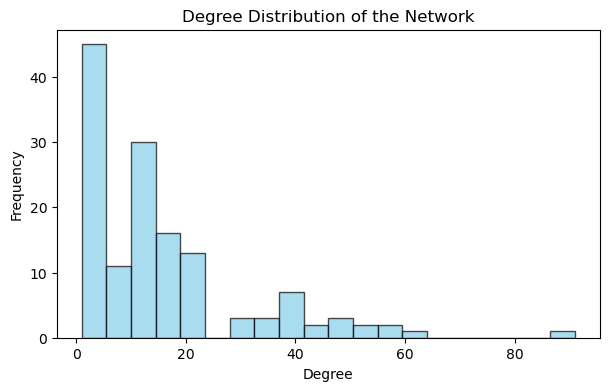

In [27]:
degrees = [deg for _, deg in G.degree()]

plt.figure(figsize=(7, 4))
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Network')
plt.show()

The distribution is right-skewed, with a few nodes having a high degree and the majority of nodes having a low degree (close to zero).

We can understand what is the role and the position of the nodes in the network by computing the centrality indices.

- **degree centrality** = it measures the centrality of a node by the number of direct connections it has. It reflects the influence of a node within the network. It is interpreted as a percentage.

- **betweenness centrality** = it measures how often a node appears on the shortest path between pairs of other nodes. It reflects a node's role as a bridge or connector. Its maximum depends on the structure of the network, hence it is always relatively interpreted. 

- **closeness centrality** = it is calculated based on the average length of the shortest path from the node to all other nodes. It reflects how close a node is to all other nodes in the network. It takes value between 0 and 1. 

In [29]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

top_degree = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:", top_degree)
print("Top 5 nodes by betweenness centrality:", top_betweenness)
print("Top 5 nodes by closeness centrality:", top_closeness)

Top 5 nodes by degree centrality: [(71, 0.6594202898550725), (78, 0.4420289855072464), (8, 0.41304347826086957), (99, 0.39855072463768115), (57, 0.391304347826087)]
Top 5 nodes by betweenness centrality: [(71, 0.0573599290824362), (8, 0.014212430000835176), (81, 0.012253964472742632), (78, 0.012181031922025251), (85, 0.0111383467195495)]
Top 5 nodes by closeness centrality: [(138, 0.491343517430474), (115, 0.412617220801364), (121, 0.40018115942028987), (99, 0.3639571518588532), (131, 0.35144927536231885)]


- Company 71 has the highest degree centrality, of approximately 0.66, meaning it is directly connected to approximately 66% of other nodes, either through owning them or being owned by them. 
- It's also the company with the highest betweenness centrality, indicating it plays a significant role as a bridge within the network, even though the value is very low, a confirmation of the direct ownership structure of the network. The network as a whole relies on direct ownership relationships rather than intermediary connections. 
- It doesn't show up anyway on the top 5 of the closeness centrality index, suggesting that while it has many direct connections, it doesn’t have quick access to all other companies within the network.
- Company 138, on the other hand, is the one with highest closeness centrality, while it doesn't seem to be strongly connected and a strong connector in the network.

We can compute a scatter plot of the indices and plot the distribution of the degree centrality.

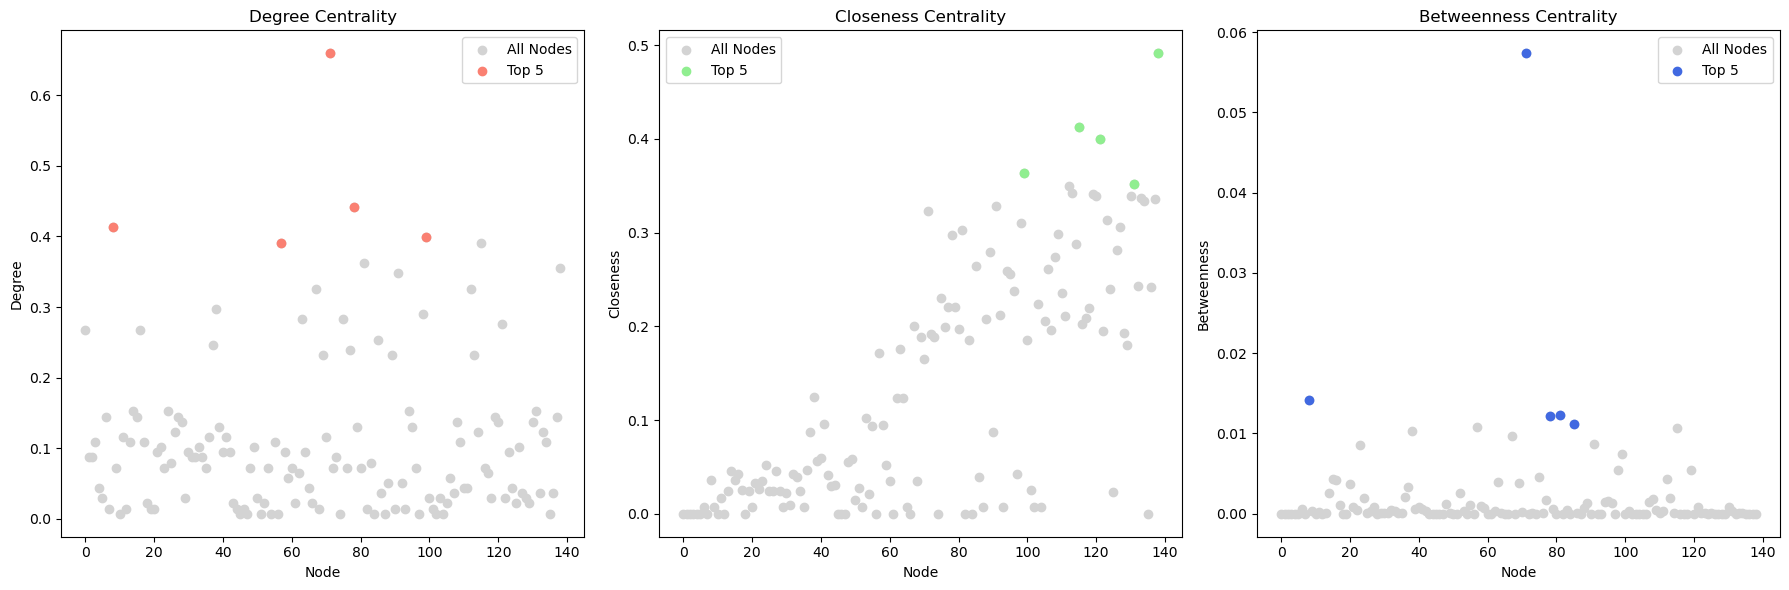

In [30]:
top_degree_nodes = [node for node, _ in top_degree]
top_betweenness_nodes = [node for node, _ in top_betweenness]
top_closeness_nodes = [node for node, _ in top_closeness]

# Plot each centrality measure as a scatter plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Degree Centrality 
ax[0].scatter(degree_centrality.keys(), degree_centrality.values(), color='lightgray', label='All Nodes')
ax[0].scatter(top_degree_nodes, [degree_centrality[node] for node in top_degree_nodes], color='salmon', label='Top 5')
ax[0].set_title("Degree Centrality")
ax[0].set_xlabel("Node")
ax[0].set_ylabel("Degree")

# Closeness Centrality
ax[1].scatter(closeness_centrality.keys(), closeness_centrality.values(), color='lightgray', label='All Nodes')
ax[1].scatter(top_closeness_nodes, [closeness_centrality[node] for node in top_closeness_nodes], color='lightgreen', label='Top 5')
ax[1].set_title("Closeness Centrality")
ax[1].set_xlabel("Node")
ax[1].set_ylabel("Closeness")

# Betweenness Centrality
ax[2].scatter(betweenness_centrality.keys(), betweenness_centrality.values(), color='lightgray', label='All Nodes')
ax[2].scatter(top_betweenness_nodes, [betweenness_centrality[node] for node in top_betweenness_nodes], color='royalblue', label='Top 5')
ax[2].set_title("Betweenness Centrality")
ax[2].set_xlabel("Node")
ax[2].set_ylabel("Betweenness")

# Adding legends and layout adjustments
for a in ax:
    a.legend()

plt.tight_layout()
plt.show()

- A few nodes have significantly higher values of Degree Centrality
- Half of the nodes has low Closeness Centrality while the other half has an high value
- Betweenness Centrality plot is sparse

## 4. Topology

The *topology* of a network tells us how connections are distributed across the nodes of the represented system.

We can look if the network presents a specific structure.

For instance, as many other financial networks, our network can have a **core-periphery** structure. A core-periphery structure consists of:

- A *core* of nodes that are highly interconnected with each other and midly interconnected with the other nodes.

- A *periphery* of nodes that mostly connect to the core, not to each other.

The following code shows how to find the core of the network (if it exists) and visualize it:

Number of core nodes: 24
Number of periphery nodes: 115


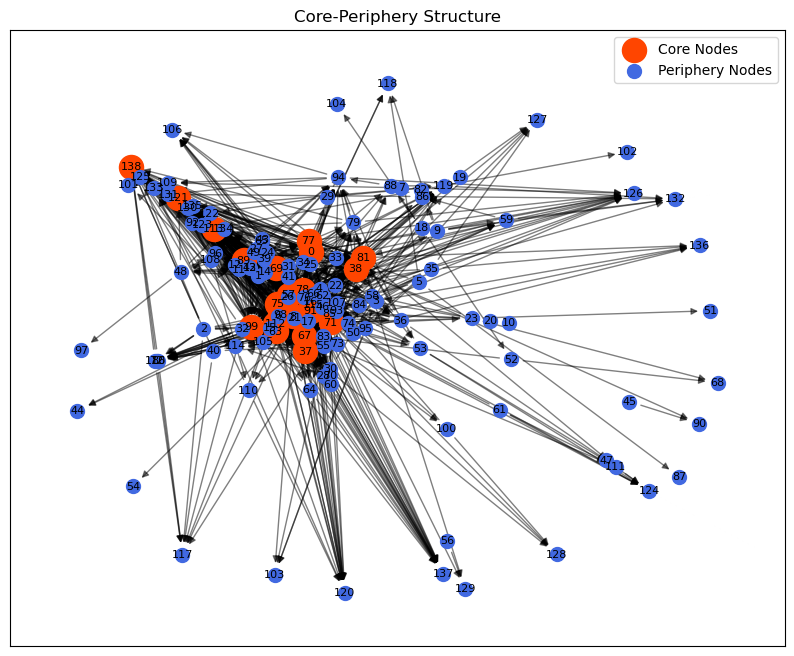

In [31]:
k_core = nx.k_core(G)  # find the core

core_nodes = set(k_core.nodes())
periphery_nodes = set(G.nodes()) - core_nodes

print(f"Number of core nodes: {len(core_nodes)}")
print(f"Number of periphery nodes: {len(periphery_nodes)}")

# plot the graph to visualize the structure
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='orangered', label='Core Nodes', node_size=300)           # core nodes are in bigger size
nx.draw_networkx_nodes(G, pos, nodelist=periphery_nodes, node_color='royalblue', label='Periphery Nodes', node_size=100) # periphery nodes in small size 
nx.draw_networkx_labels(G, pos, font_size=8)                                                                             # label for the nodes
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Core-Periphery Structure")
plt.legend()
plt.show()


It exists a well defined core of the network of 24 nodes, while the others are more peripherical. 
To conclude, in this network it is possible to distinguish betwene a core and periphery, some nodes are more important, powerful, influent than others.

We can verify the robustness of the core-periphery structure hypothesis, first of all by verifying that the core nodes have higher degree centrality than the periphery nodes. We do a scatter plot to verify this graphically.

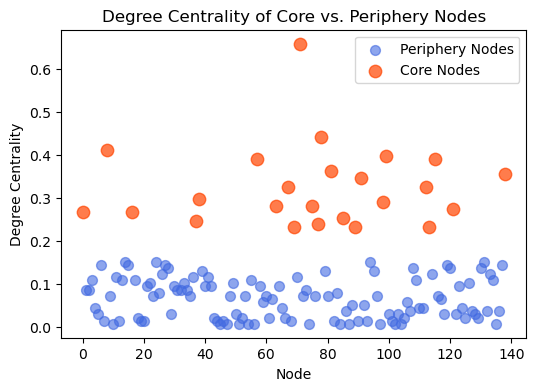

In [33]:
degree_centrality = nx.degree_centrality(G)

core_nodes = list(k_core.nodes()) 
periphery_nodes = [node for node in G.nodes() if node not in core_nodes]

core_centrality = [degree_centrality[node] for node in core_nodes]
periphery_centrality = [degree_centrality[node] for node in periphery_nodes]

plt.figure(figsize=(6, 4))
plt.scatter(periphery_nodes, periphery_centrality, color='royalblue', label='Periphery Nodes', alpha=0.6, s=50)  # periphery
plt.scatter(core_nodes, core_centrality, color='orangered', label='Core Nodes', alpha=0.7, s=80)                 # core

plt.xlabel("Node")
plt.ylabel("Degree Centrality")
plt.title("Degree Centrality of Core vs. Periphery Nodes")
plt.legend()
plt.show()

The core nodes consistently exhibit higher degree centrality. 

Another verification we can do is to compare this result with what we would find in a randomized network.
Hypothesis: the CP structure is a specific feature of my network. If it's not, then any network shows this structure. Namely, if I pick a random network, that will also show a CP structure.

We can compute 1000 (or more) randomized network of the same size (number of nodes + number of edges) of our network, calculate for each node, in each network, its degree centrality, then for each node we take the average across the 1000 results and see if the scatter plot is significantly different from the one of our network. 
The **Erdős-Rényi model** creats random graphs which represent a solid baseline to study real networks. The model starts with a set of N nodes and then it adds randomly the set of edges defined.

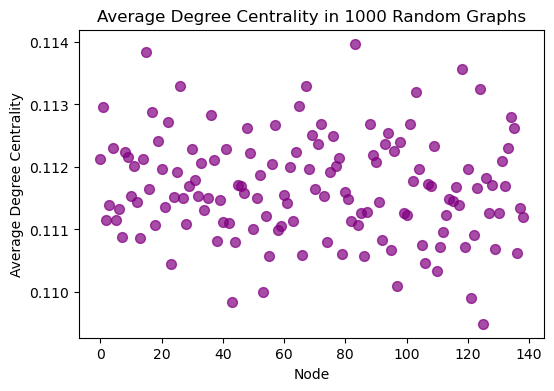

In [34]:
# Parameters
num_nodes = 139
num_edges = 1071
num_randomizations = 1000

# Dictionary to accumulate degree centralities for each node
avg_degree_centrality_random = {node: 0 for node in range(num_nodes)}

# Random graphs + degree centrality for each node in each graph
for _ in range(num_randomizations):
    random_graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True) # generate a random graph with Erdős-Rényi model
    degree_centrality_random = nx.degree_centrality(random_graph)
    for node, centrality in degree_centrality_random.items():               # store the degree centrality for each node
        avg_degree_centrality_random[node] += centrality

avg_degree_centrality_random = {node: centrality / num_randomizations for node, centrality in avg_degree_centrality_random.items()}

# Scatter plot
nodes = list(avg_degree_centrality_random.keys())
average_centralities = list(avg_degree_centrality_random.values())

plt.figure(figsize=(6, 4))
plt.scatter(nodes, average_centralities, color='purple', alpha=0.7, s=50)
plt.xlabel("Node")
plt.ylabel("Average Degree Centrality")
plt.title("Average Degree Centrality in 1000 Random Graphs")
plt.show()

As you can see, nodes have pretty much the same value of degree centrality, which is generally not high. We can see the networks are kind of uniform in terms of links distribution. We can't see concentration.

# Dynamic networks & further analysis

- We've explored **static networks**, namely we analyzed a snapshot of a network, but we can also study them across time. In such case we talk about **dynamic networks**.
- We would repeat the analysis for many snapshots of a network, across a certain interval of time
- Any network measure, like degree, clustering, or community structure becomes a time series, allowing you to observe how the network changes across time. 

E.g. you can study the evolution of an interbank market in a time span which includes 2008 crisis to see what was the impact of this shock on the number of participants, their relationships, their level of trust.

Additional analyses you can do:
1. **Null models:**
- Test for network properties by comparing real networks to randomized versions.
- Why: useful for understanding the significance of observed structures, like communities or degree distributions.

2. **Test network resilience:**
- Study how networks respond to node or edge removal (intentional attacks or random failures).
- Why: assess network vulnerability and design networks for optimal resilience.

3. **Influence and Diffusion Modeling:**
- Model how information, diseases, or behaviors spread through networks.
- Why: to study epidemics, crises.

# Conclusions

- Network Analysis unveils hidden structures and patterns across economics, finance
- Many indices to delve into network's structure
- Static vs Dynamic: networks evolve; analyzing these changes reveals trends and stability.
- Advanced Techniques offer deeper insights.
- Real-World Impact: Essential for understanding dependencies, managing risks, and making data-driven decisions.


In [5]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )